In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import re
import time




In [2]:
dog = pd.read_csv('twitter-archive-enhanced.csv',encoding='latin-1')

In [3]:
dog.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
dog.info

<bound method DataFrame.info of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689        

In [5]:
dog['rating_numerator']

0       13
1       13
2       12
3       13
4       12
5       13
6       13
7       13
8       13
9       14
10      13
11      13
12      13
13      12
14      13
15      13
16      12
17      13
18      13
19      13
20      12
21      13
22      14
23      13
24      13
25      12
26      13
27      13
28      13
29      12
        ..
2326     2
2327     7
2328     9
2329    11
2330     6
2331     8
2332    10
2333     9
2334     3
2335     1
2336    11
2337    10
2338     1
2339    11
2340     8
2341     9
2342     6
2343    10
2344     9
2345    10
2346     8
2347     9
2348    10
2349     2
2350    10
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64

This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL

In [6]:
import requests

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [8]:
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
dog_images = pd.read_csv('image-predictions.tsv', sep='\t')
dog_images.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [9]:

import tweepy


consumer_key = '4ckFbeGhC4HgeHwrhIUBOpfx4'
consumer_secret = 'ZpIhhcQoTFqtTnYmsgAZFWExsdgl0FaHqlF4p5OhhXr97gJjX0'
access_token = '775482130520543232-Bf2EQ0TEdx4hFYBQD8Nk5mriXEKQxwZ'
access_secret = 'cdGASZpGVf3AHl6sP3tOqz9Uwj0AxE31oQerlJN0yI50O'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
api.wait_on_rate_limit = True
api.wait_on_rate_limit_notify = True




Tweet data is stored in JSON format by Twitter. Getting tweet JSON data via tweet ID using Tweepy is described well in this StackOverflow answer. Note that setting the tweet_mode parameter to 'extended' in the get_status call, i.e., api.get_status(tweet_id, tweet_mode='extended'), can be useful.



In [10]:

# # Creat a list where we will store the result
# df_list = []
# #where we will store the tweet_id of the errors
# error_list = []

# tweet_id = dog_images['tweet_id']
# for id in tweet_id:
#     try:
    
#         page = api.get_status(id)
#         favorites = page['favorite_count'] # How many favorites the tweet had
#         retweets = page['retweet_count'] # Count of the retweet
#         date_time = page['created_at'] # The date and time of the creation
        
#         df_list.append({'tweet_id': int(id),
#                         'favorites': int(favorites),
#                         'retweets': int(retweets),
#                         'date_time': pd.to_datetime(date_time)})
    
    
#     # Catch the exceptions of the TweepError
#     except Exception as e:
#         print(str(tweet_id)+ " _ " + str(e))
#         error_list.append(id)


In [11]:
# # lengh of the result
# print(len(df_list))
# # The tweet_id of the errors
# print(len(error_list))

In [12]:
with open('tweet_json.txt', 'w') as file:
    for tweet_id in dog['tweet_id']:

        try:

            status = api.get_status(tweet_id)

            json.dump(status._json, file)

            file.write('\n')

        except:

            print("missing ", tweet_id)

missing  888202515573088257
missing  873697596434513921
missing  869988702071779329
missing  866816280283807744
missing  861769973181624320
missing  842892208864923648
missing  802247111496568832
missing  775096608509886464
Rate limit reached. Sleeping for: 705
Rate limit reached. Sleeping for: 707


In [13]:
import json
twt_id = []
faves = []
rts = []

with open('tweet_json.txt',mode='r')as json_file:
    for line in json_file.readlines():
        tweet_data = json.loads(line)
        twt_id.append(tweet_data['id'])
        faves.append(tweet_data['favorite_count'])
        rts.append(tweet_data['retweet_count'])
        
additional_tweet_data = pd.DataFrame({'tweet_id':twt_id, 'favorite_count':faves, 'retweet_count':rts})

In [58]:
additional_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 3 columns):
favorite_count    2348 non-null int64
retweet_count     2348 non-null int64
tweet_id          2348 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


In [15]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
dog_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# ACCESSING DATA

In [17]:
dog.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
dog.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1528,690348396616552449,NaN,NaN,2016-01-22 01:40:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oddie. He's trying to communicate. 12/...,NaN,NaN,NaN,https://vine.co/v/iejBWerY9X2,12,10,Oddie,None,None,None,None
981,749417653287129088,NaN,NaN,2016-07-03 01:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's the most unphotogenic puppe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749417653...,11,10,Finn,None,None,pupper,None
1943,673709992831262724,NaN,NaN,2015-12-07 03:45:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know a lot of you are studying for finals. G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673709992...,12,10,None,None,None,None,None
1709,680609293079592961,NaN,NaN,2015-12-26 04:41:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. That is his chair. He loves his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680609293...,9,10,Brody,None,None,None,None
195,855138241867124737,NaN,NaN,2017-04-20 19:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @frasercampbell_: oh my... what's that... b...,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855...,14,10,None,None,None,None,None
1506,691756958957883396,NaN,NaN,2016-01-25 22:58:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691756958...,10,10,None,None,None,None,None
2185,668986018524233728,NaN,NaN,2015-11-24 02:54:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She's a Bimmington Fettuccini. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668986018...,9,10,Ruby,None,None,None,None


In [19]:
dog.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:

print(dog[dog.tweet_id.isnull()])
print(dog[dog.tweet_id.duplicated()])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [21]:
print(dog[dog.rating_numerator == 0])

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546                    NaN                  NaN   
1016  746906459439529985           7.468859e+17         4.196984e+09   

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
1016  2016-06-26 03:22:31 +0000   

                                                 source  \
315   <a href="http://twitter.com/download/iphone" r...   
1016  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
315   When you're so blinded by your systematic plag...                  NaN   
1016  PUPDATE: can't see any. Even if I could, I cou...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
315                        NaN                        NaN   
1016                       NaN                        NaN   

                                          expanded_urls  rating_numerator 

In [22]:

print(dog.name.value_counts())

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Toby          7
Buddy         7
Bailey        7
an            7
Daisy         7
Rusty         6
Oscar         6
Dave          6
Bella         6
Koda          6
Scout         6
Jack          6
Jax           6
Stanley       6
Leo           6
Milo          6
Gus           5
           ... 
Maya          1
Walker        1
Huck          1
old           1
Travis        1
Sprout        1
Al            1
Striker       1
Tycho         1
Shelby        1
Ole           1
Barclay       1
Ron           1
Sandra        1
Bode          1
Bobble        1
Vinscent      1
Rooney        1
Karl          1
Ivar          1
Poppy         1
Stormy        1
Marq          1
Winifred      1
Major         1
Toffee        1
Eevee         1
Zeek          1
Maude         1
Timber        1
Name: name, Length: 957,

In [23]:
dog_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
dog_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
additional_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 3 columns):
favorite_count    2348 non-null int64
retweet_count     2348 non-null int64
tweet_id          2348 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


In [26]:
additional_tweet_data.describe()

,favorite_count,retweet_count,tweet_id
count,2348.000000,2348.000000,2.348000e+03
mean,8113.313032,3074.319847,7.424145e+17
std,12193.072715,5100.139904,6.837627e+16
min,0.000000,0.000000,6.660209e+17
25%,1410.000000,613.500000,6.783868e+17
50%,3570.500000,1435.500000,7.191522e+17
75%,10063.250000,3579.250000,7.987607e+17
max,143573.000000,78378.000000,8.924206e+17


# Tidiness Issues
1,doggo,floofer,pupper,puppo should be within a column called "name"
2,combine three dataframe as one dataframe, then drop the unnecessary column


# quality issues
1 dog dataframe
wrong data type:
tweet_id:int64( should be string)
in_reply_to_status_id:float64(should be string)
in_reply_to_user_id:float64(should be string)
retweeted_status_id:float64 
retweeted_status_user_id:float64 (should be string)
timestamp:object(should be Datetime)

2 dog_images dataframe
wrong data type:
tweet_id:int64 (SHOULD BE STRING)

3 additional_tweet_data dataframe, 
wrong data type:
tweet_id:int64 (SHOULD BE STRING)

4 745 dogs no names,55 dogs named a
None         745
a             55

5 two dogs' rating is 0
tweet_id  
315   835152434251116546                                      
1016  746906459439529985

# Cleaning Data



In [34]:

#creating copies of the dataframes to clean. 
dog_clean = dog.copy()
additional_tweet_data_clean = additional_tweet_data.copy()
dog_images_clean = dog_images.copy()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


# Melt the doggo, pupper, puppo, and floofer columns into one column

In [41]:
# dog_clean.tweet_id
tweet_ids = dog_clean.tweet_id.tolist()
tweet_ids
    




[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [47]:
dog_clean =pd.melt(dog_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                       'retweeted_status_user_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
                                       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], 
        var_name = 'type_toberemoved', value_name = 'type')

In [48]:
dog_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type_toberemoved,type
0,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,type,None
1,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,type,None
2,891815181378084864,NaN,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,type,None
3,891689557279858688,NaN,NaN,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,type,None
4,891327558926688256,NaN,NaN,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,type,None
5,891087950875897856,NaN,NaN,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,type,None
6,890971913173991426,NaN,NaN,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,type,None
7,890729181411237888,NaN,NaN,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,type,None
8,890609185150312448,NaN,NaN,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,type,None
9,890240255349198849,NaN,NaN,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,type,doggo


In [49]:
dog_clean = dog_clean.drop('type_toberemoved', axis =1)

In [50]:
dog_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,NaN,NaN,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,NaN,NaN,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,NaN,NaN,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,NaN,NaN,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,NaN,NaN,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [51]:
print(dog_clean.type.value_counts())

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: type, dtype: int64


In [52]:
#Merging dog_clean and additional_tweet_data_clean.
#We will set the how parameter to 'inner'; that way we only deal with tweets that are in both tables.

combine_clean = pd.merge(dog_clean, additional_tweet_data_clean, on = ['tweet_id'], how = 'inner')

In [53]:
combine_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39170,8722
1,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39170,8722
2,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39170,8722
3,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39170,8722
4,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33546,6401
5,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33546,6401
6,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33546,6401
7,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33546,6401
8,891815181378084864,NaN,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25281,4255
9,891815181378084864,NaN,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25281,4255


In [54]:
#Merging 'inner' again for same reason.
combine_clean_all = pd.merge(combine_clean,dog_images, on ='tweet_id', how = 'inner')

In [55]:
combine_clean_all

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
3,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
4,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
5,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
6,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
7,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
8,891815181378084864,NaN,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
9,891815181378084864,NaN,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [57]:
combine_clean_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8280 entries, 0 to 8279
Data columns (total 27 columns):
tweet_id                      8280 non-null int64
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
retweeted_status_id           304 non-null float64
retweeted_status_user_id      304 non-null float64
timestamp                     8280 non-null object
source                        8280 non-null object
text                          8280 non-null object
retweeted_status_timestamp    304 non-null object
expanded_urls                 8280 non-null object
rating_numerator              8280 non-null int64
rating_denominator            8280 non-null int64
name                          8280 non-null object
type                          8280 non-null object
favorite_count                8280 non-null int64
retweet_count                 8280 non-null int64
jpg_url                       8280 non-null object
img_num                       8280

Quality Tasks
1) We only want original ratings. So we don't want tweets replying to another tweet, or retweeted tweets.

2) the wrong data type: tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and timestamp.

3) There are a few tweets that have been deleted. I.e missing API data

4) We are missing data for the dog breed predictions.

5) Some names in the name columns can't possibly be dog names. (a, the, an, this...)



# we only want tweets that do not have a in_reply_to_status_id, or a retweeted_statusid. We will also drop the columns associated with replys and retweets. 

In [60]:
combine_clean_all[~combine_clean_all.in_reply_to_status_id.isnull()].tweet_id

488     863079547188785154
489     863079547188785154
490     863079547188785154
491     863079547188785154
600     856526610513747968
601     856526610513747968
602     856526610513747968
603     856526610513747968
796     844979544864018432
797     844979544864018432
798     844979544864018432
799     844979544864018432
1816    802265048156610565
1817    802265048156610565
1818    802265048156610565
1819    802265048156610565
3316    746906459439529985
3317    746906459439529985
3318    746906459439529985
3319    746906459439529985
3324    746818907684614144
3325    746818907684614144
3326    746818907684614144
3327    746818907684614144
3712    729838605770891264
3713    729838605770891264
3714    729838605770891264
3715    729838605770891264
4436    705786532653883392
4437    705786532653883392
               ...        
6270    675870721063669760
6271    675870721063669760
6304    675707330206547968
6305    675707330206547968
6306    675707330206547968
6307    675707330206547968
6

In [62]:
#dropping reply tweet
combine_clean_all = combine_clean_all[combine_clean_all.in_reply_to_status_id.isnull()]

#dropping retweeted tweets
combine_clean_all = combine_clean_all[combine_clean_all.retweeted_status_id.isnull()]



In [63]:
#dropping columns related to tweets that were retweeted or reply tweets
combine_clean_all = combine_clean_all.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1 )

In [64]:
combine_clean_all

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39170,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39170,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39170,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
3,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39170,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
4,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33546,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
5,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33546,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
6,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33546,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
7,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33546,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
8,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25281,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
9,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25281,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [65]:
combine_clean_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7884 entries, 0 to 8279
Data columns (total 22 columns):
tweet_id              7884 non-null int64
timestamp             7884 non-null object
source                7884 non-null object
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null int64
rating_denominator    7884 non-null int64
name                  7884 non-null object
type                  7884 non-null object
favorite_count        7884 non-null int64
retweet_count         7884 non-null int64
jpg_url               7884 non-null object
img_num               7884 non-null int64
p1                    7884 non-null object
p1_conf               7884 non-null float64
p1_dog                7884 non-null bool
p2                    7884 non-null object
p2_conf               7884 non-null float64
p2_dog                7884 non-null bool
p3                    7884 non-null object
p3_conf               7884 non-null float

# Convert the tweet_id to string. Convert timestamp to datetime. The following variables need to be switched to category data type: type, p1, p2, and p3. The following variables need to be switched to a boolean data type: p1_dog, p2_dog, p3_dog. The following data types need to be switched to a float data type: rating_numerator, rating_numerator.


In [76]:
#converting tweet_id to string
combine_clean_all.tweet_id = combine_clean_all.tweet_id.astype('str')

#converting timestamp to datetime
combine_clean_all.timestamp = pd.to_datetime(combine_clean_all.timestamp)
#Switch type, p1 ,p2, and p3 to category.
combine_clean_all.p1 = combine_clean_all.p1.astype('category')
combine_clean_all.p2 = combine_clean_all.p2.astype('category')
combine_clean_all.p3 = combine_clean_all.p3.astype('category')
combine_clean_all.type = combine_clean_all.type.astype('category')

#Switch p1_dog, p2_dog, and p3_dog to boolean
combine_clean_all.p1_dog = combine_clean_all.p1_dog.astype('bool')
combine_clean_all.p2_dog = combine_clean_all.p2_dog.astype('bool')
combine_clean_all.p3_dog = combine_clean_all.p3_dog.astype('bool')

#Switch rating_numerator and rating_denominator to float.
combine_clean_all.rating_numerator = combine_clean_all.rating_numerator.astype(float)
combine_clean_all.rating_denominator = combine_clean_all.rating_denominator.astype(float)

In [77]:
combine_clean_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7884 entries, 0 to 8279
Data columns (total 22 columns):
tweet_id              7884 non-null object
timestamp             7884 non-null datetime64[ns]
source                7884 non-null object
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null float64
rating_denominator    7884 non-null float64
name                  7884 non-null object
type                  7884 non-null category
favorite_count        7884 non-null int64
retweet_count         7884 non-null int64
jpg_url               7884 non-null object
img_num               7884 non-null int64
p1                    7884 non-null category
p1_conf               7884 non-null float64
p1_dog                7884 non-null bool
p2                    7884 non-null category
p2_conf               7884 non-null float64
p2_dog                7884 non-null bool
p3                    7884 non-null category
p3_conf             

In [78]:
type(combine_clean_all['tweet_id'][0])

str

In [79]:
combine_clean_all.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2615,771136648247640064,2016-09-01 00:04:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Dixie. She wants to be a ship captain....,https://twitter.com/dog_rates/status/771136648...,11.0,10.0,Dixie,None,10100,...,1,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,0.201711,False
1571,813202720496779264,2016-12-26 02:00:11,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who has concluded that Christma...,https://twitter.com/dog_rates/status/813202720...,11.0,10.0,None,None,10085,...,1,cocker_spaniel,0.701852,True,golden_retriever,0.120345,True,Labrador_retriever,0.036320,True
3801,726224900189511680,2016-04-30 01:41:23,"<a href=""http://twitter.com/download/iphone"" r...",I'm getting super heckin frustrated with you a...,https://twitter.com/dog_rates/status/726224900...,9.0,10.0,None,None,4746,...,1,standard_poodle,0.261112,True,cocker_spaniel,0.094785,True,bucket,0.069946,False
1220,826598365270007810,2017-02-01 01:09:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Pawnd... James Pawnd. He's suave af. 1...,https://twitter.com/dog_rates/status/826598365...,13.0,10.0,Pawnd,None,10983,...,1,French_bulldog,0.628119,True,Siamese_cat,0.117397,False,cougar,0.082765,False
3615,735635087207878657,2016-05-26 00:54:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He hasn't grow into his skin y...,https://twitter.com/dog_rates/status/735635087...,11.0,10.0,Dakota,None,6690,...,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False


# Drop rows that do not have a jpg_url column as tweets without a jpg_url do not contain images.

In [80]:
combine_clean_all =combine_clean_all[~combine_clean_all.jpg_url.isnull()]

In [81]:
combine_clean_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7884 entries, 0 to 8279
Data columns (total 22 columns):
tweet_id              7884 non-null object
timestamp             7884 non-null datetime64[ns]
source                7884 non-null object
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null float64
rating_denominator    7884 non-null float64
name                  7884 non-null object
type                  7884 non-null category
favorite_count        7884 non-null int64
retweet_count         7884 non-null int64
jpg_url               7884 non-null object
img_num               7884 non-null int64
p1                    7884 non-null category
p1_conf               7884 non-null float64
p1_dog                7884 non-null bool
p2                    7884 non-null category
p2_conf               7884 non-null float64
p2_dog                7884 non-null bool
p3                    7884 non-null category
p3_conf             

In [82]:
combine_clean_all.name.value_counts()

None         2096
a             220
Charlie        44
Oliver         40
Lucy           40
Cooper         40
Tucker         36
Penny          36
Sadie          32
Winston        32
Daisy          28
the            28
Toby           28
Lola           28
Bo             24
Jax            24
Koda           24
Bella          24
Stanley        24
an             24
Oscar          20
Louis          20
Scout          20
Rusty          20
Chester        20
Milo           20
Bailey         20
Dave           20
Buddy          20
Leo            20
             ... 
Emanuel         4
Herb            4
Fred            4
Chase           4
Tove            4
actually        4
Puff            4
Shikha          4
Hermione        4
Jeffrie         4
Brownie         4
Jiminus         4
Arlen           4
Schnitzel       4
Edmund          4
Antony          4
Kaiya           4
Ivar            4
Stewie          4
Strudel         4
Kendall         4
Patch           4
Bell            4
Kenzie          4
Pip       

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7884 entries, 0 to 8279
Data columns (total 22 columns):
tweet_id              7884 non-null object
timestamp             7884 non-null datetime64[ns]
source                7884 non-null object
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null float64
rating_denominator    7884 non-null float64
name                  7884 non-null object
type                  7884 non-null category
favorite_count        7884 non-null int64
retweet_count         7884 non-null int64
jpg_url               7884 non-null object
img_num               7884 non-null int64
p1                    7884 non-null category
p1_conf               7884 non-null float64
p1_dog                7884 non-null bool
p2                    7884 non-null category
p2_conf               7884 non-null float64
p2_dog                7884 non-null bool
p3                    7884 non-null category
p3_conf             

In [88]:
combine_clean_all.name.value_counts()

None         2372
Charlie        44
Lucy           40
Oliver         40
Cooper         40
Penny          36
Tucker         36
Sadie          32
Winston        32
Lola           28
Daisy          28
Toby           28
Koda           24
Bo             24
Stanley        24
Bella          24
Jax            24
Scout          20
Oscar          20
Louis          20
Rusty          20
Buddy          20
Chester        20
Bailey         20
Milo           20
Dave           20
Zoey           20
Leo            20
Oakley         16
Scooter        16
             ... 
Dylan           4
Brudge          4
Emanuel         4
Dante           4
Carter          4
Tedrick         4
Eleanor         4
Fabio           4
Cheesy          4
Darla           4
Jessifer        4
Puff            4
Hermione        4
Jeffrie         4
Brownie         4
Jiminus         4
Arlen           4
Schnitzel       4
Edmund          4
Antony          4
Kaiya           4
Ivar            4
Stewie          4
Strudel         4
Kendall   

In [92]:
combine_clean_all.duplicated()

0       False
1        True
2        True
3        True
4       False
5        True
6        True
7        True
8       False
9        True
10       True
11       True
12      False
13       True
14       True
15       True
16      False
17       True
18       True
19       True
20      False
21       True
22       True
23       True
24      False
25       True
26       True
27       True
28      False
29       True
        ...  
7854     True
7855     True
7856    False
7857     True
7858     True
7859     True
7860    False
7861     True
7862     True
7863     True
7864    False
7865     True
7866     True
7867     True
7868    False
7869     True
7870     True
7871     True
7872    False
7873     True
7874     True
7875     True
7876    False
7877     True
7878     True
7879     True
7880    False
7881     True
7882     True
7883     True
Length: 7884, dtype: bool

None         2372
Charlie        44
Lucy           40
Oliver         40
Cooper         40
Penny          36
Tucker         36
Sadie          32
Winston        32
Lola           28
Daisy          28
Toby           28
Koda           24
Bo             24
Stanley        24
Bella          24
Jax            24
Scout          20
Oscar          20
Louis          20
Rusty          20
Buddy          20
Chester        20
Bailey         20
Milo           20
Dave           20
Zoey           20
Leo            20
Oakley         16
Scooter        16
             ... 
Dylan           4
Brudge          4
Emanuel         4
Dante           4
Carter          4
Tedrick         4
Eleanor         4
Fabio           4
Cheesy          4
Darla           4
Jessifer        4
Puff            4
Hermione        4
Jeffrie         4
Brownie         4
Jiminus         4
Arlen           4
Schnitzel       4
Edmund          4
Antony          4
Kaiya           4
Ivar            4
Stewie          4
Strudel         4
Kendall   

In [93]:
combine_clean_all.drop_duplicates()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,39170,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
4,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,33546,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
8,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,25281,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
12,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,42535,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
16,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,40714,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
20,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,20410,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
24,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,11968,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
28,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,66189,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
32,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,28025,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
36,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,32235,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [94]:
combine_clean_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7884 entries, 0 to 7883
Data columns (total 22 columns):
tweet_id              7884 non-null object
timestamp             7884 non-null datetime64[ns]
source                7884 non-null object
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null float64
rating_denominator    7884 non-null float64
name                  7884 non-null object
type                  7884 non-null category
favorite_count        7884 non-null int64
retweet_count         7884 non-null int64
jpg_url               7884 non-null object
img_num               7884 non-null int64
p1                    7884 non-null category
p1_conf               7884 non-null float64
p1_dog                7884 non-null bool
p2                    7884 non-null category
p2_conf               7884 non-null float64
p2_dog                7884 non-null bool
p3                    7884 non-null category
p3_conf             

# exploring and visualizing the data

In [95]:
combine_clean_all['type'].value_counts()

None       7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: type, dtype: int64

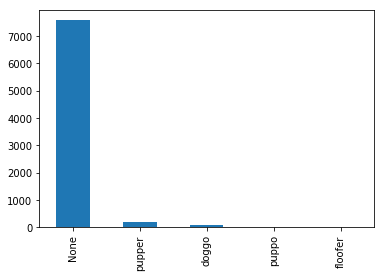

In [100]:
import matplotlib.pyplot as plt
combine_clean_all['type'].value_counts().plot(kind='bar')

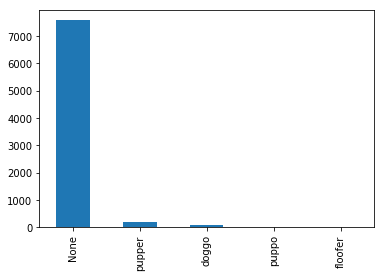

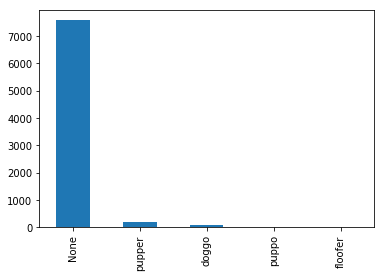

In [103]:
toptype=combine_clean_all['type'].value_counts().plot(kind='bar')

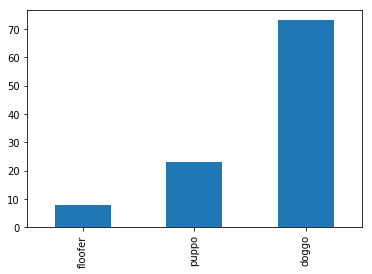

In [114]:
toptype=combine_clean_all['type'].value_counts()
toptype.sort_values(ascending=True)[:3].plot(kind="bar")


In [115]:
combine_clean_all.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,7884.000000,7884.000000,7884.000000,7884.000000,7884.000000,7884.000000,7.884000e+03,7.884000e+03
mean,12.223237,10.477423,8964.528666,2770.847793,1.201928,0.594558,1.345850e-01,6.016556e-02
std,41.626111,6.851971,12678.638196,4767.126617,0.558914,0.272075,1.010335e-01,5.093187e-02
min,0.000000,2.000000,80.000000,14.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1962.000000,620.000000,1.000000,0.362925,5.328100e-02,1.605590e-02
50%,11.000000,10.000000,4090.000000,1347.000000,1.000000,0.587764,1.173970e-01,4.944380e-02
75%,12.000000,10.000000,11288.000000,3185.000000,1.000000,0.848362,1.955730e-01,9.157150e-02
max,1776.000000,170.000000,143573.000000,78378.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


The variables favorite_count, and retweet_count seem to have significantly greater means than medians. Their standard deviation is even greater than the mean. I think this means the favorite_count and retweet counts are heavily skewed.

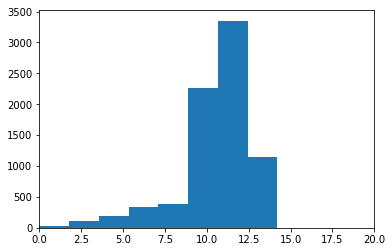

12.0      1784
10.0      1668
11.0      1568
13.0      1012
9.0        600
8.0        380
7.0        208
14.0       132
5.0        132
6.0        128
3.0         76
4.0         64
2.0         36
1.0         20
24.0         4
80.0         4
0.0          4
1776.0       4
60.0         4
99.0         4
26.0         4
144.0        4
88.0         4
121.0        4
45.0         4
420.0        4
75.0         4
165.0        4
84.0         4
27.0         4
50.0         4
204.0        4
44.0         4
Name: rating_numerator, dtype: int64

In [116]:
plt.hist(x = combine_clean_all.rating_numerator, bins = 1000)
plt.xlim(0,20)
plt.show()
combine_clean_all.rating_numerator.value_counts()

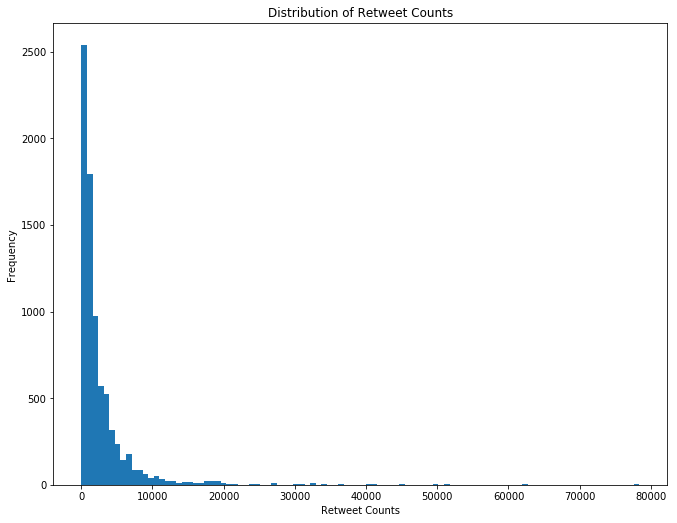

In [117]:
plt.figure(1, figsize = (11, 8.5))
plt.hist(x = combine_clean_all.retweet_count, bins = 100)
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Counts')
plt.ylabel('Frequency')
plt.show()

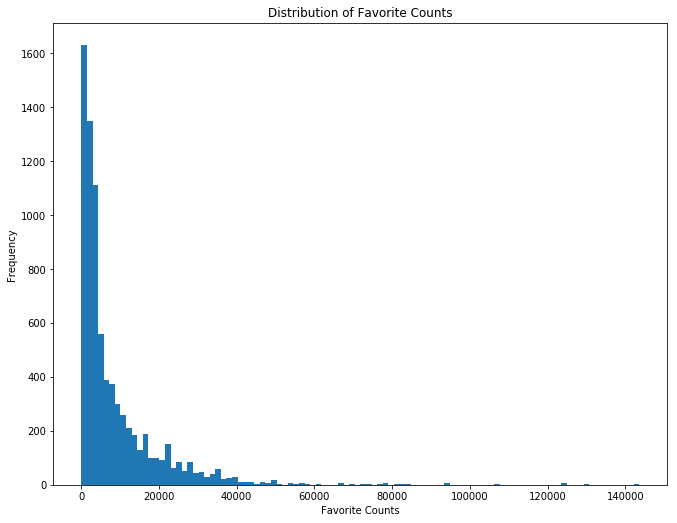

In [118]:

plt.figure(1, figsize = (11, 8.5))
plt.hist(x = combine_clean_all.favorite_count, bins = 100)
plt.title('Distribution of Favorite Counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Frequency')
plt.show()

# conclusion :The distribution of retweet_count and favorite_count look similar, but retweet_count is lower than favorite_count. I would guess that these numbers are related to timestamp.

In [119]:
# log transformation of the data
to_log = ['favorite_count', 'retweet_count']
df_logged = combine_clean_all[to_log].applymap(lambda x: np.log10(x))

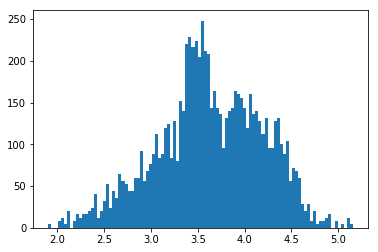

In [120]:
plt.hist(x = df_logged.favorite_count, bins = 100)
plt.show()

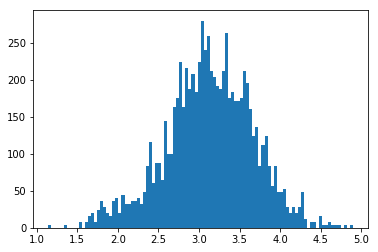

In [121]:
plt.hist(x = df_logged.retweet_count, bins = 100)
plt.show()

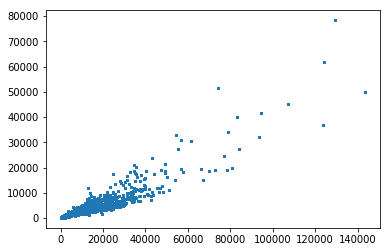

In [122]:
plt.plot(combine_clean_all.favorite_count, combine_clean_all.retweet_count, marker='o', linestyle='', ms=2 )
plt.show()

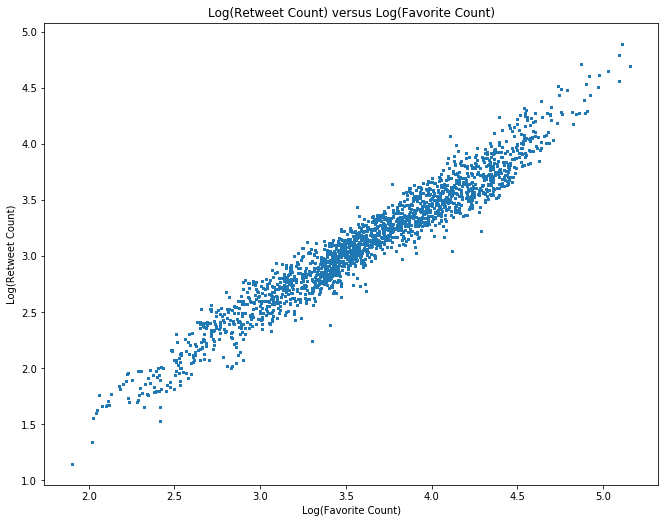

0.96853041055316491

In [123]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.favorite_count, df_logged.retweet_count, marker='o', linestyle='', ms=2 )
plt.title('Log(Retweet Count) versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Log(Retweet Count)')
plt.show()
np.corrcoef(df_logged.retweet_count, df_logged.favorite_count)[0][1]


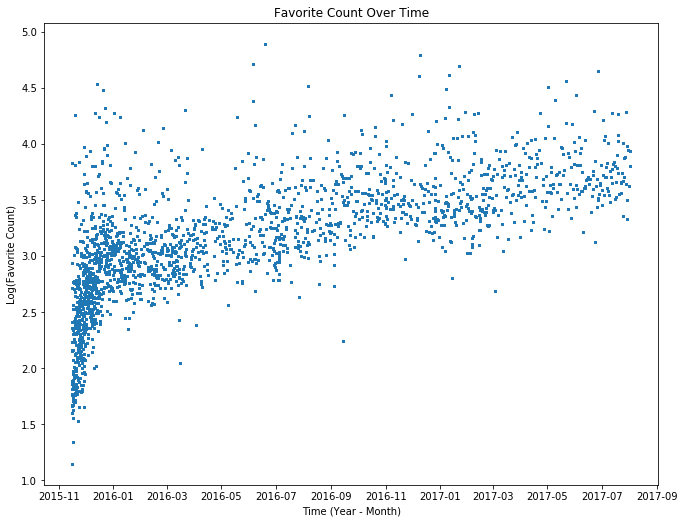

In [125]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(combine_clean_all.timestamp ,df_logged.retweet_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Favorite Count Over Time')
plt.xlabel('Time (Year - Month)')
plt.ylabel('Log(Favorite Count)')
plt.show()

# conclusion: dog_rates started to gain popularity very quickly upon first opening the account. 

In [126]:

combine_clean_all.year = pd.Series(list(range(len(combine_clean_all))))
combine_clean_all.month = pd.Series(list(range(len(combine_clean_all))))
for idx, row in combine_clean_all.iterrows():
    combine_clean_all.loc[idx,'year'] = row.timestamp.year
    combine_clean_all.loc[idx, 'month'] = row.timestamp.month

In [127]:
combine_clean_all.groupby(['month', 'year']).tweet_id.count()

month  year  
1.0    2016.0     664
       2017.0     264
2.0    2016.0     432
       2017.0     256
3.0    2016.0     472
       2017.0     188
4.0    2016.0     216
       2017.0     160
5.0    2016.0     224
       2017.0     168
6.0    2016.0     316
       2017.0     176
7.0    2016.0     352
       2017.0     196
8.0    2016.0     236
       2017.0       8
9.0    2016.0     252
10.0   2016.0     260
11.0   2015.0    1180
       2016.0     208
12.0   2015.0    1440
       2016.0     216
Name: tweet_id, dtype: int64

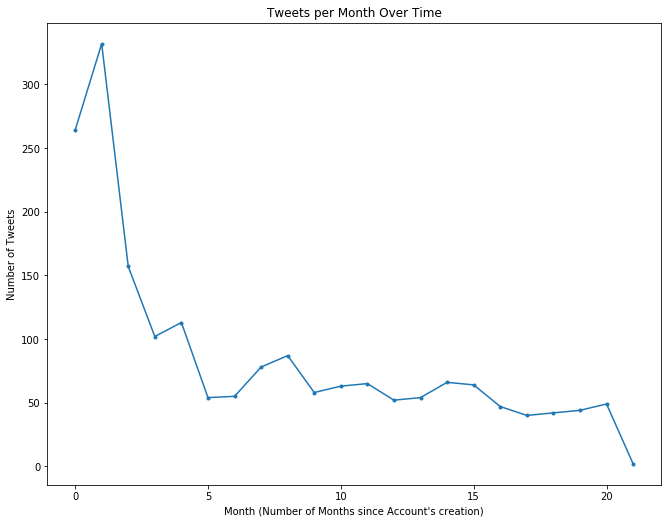

In [128]:
nmonth = list(range(22))
smonth = ['11/2015', '12/2015', '1/2016', '2/2016', '3/2016', '4/2016', ]
tweets_per_month=[264, 332, 157, 102, 113, 54, 55, 78, 87, 58, 63, 65, 52, 54, 66, 64, 47, 40, 42, 44, 49, 2]
plt.figure(1, figsize = (11, 8.5))
plt.plot(nmonth, tweets_per_month, marker= 'o', ms=3)
plt.title('Tweets per Month Over Time')
plt.xlabel('Month (Number of Months since Account\'s creation)')
plt.ylabel('Number of Tweets')
plt.show()

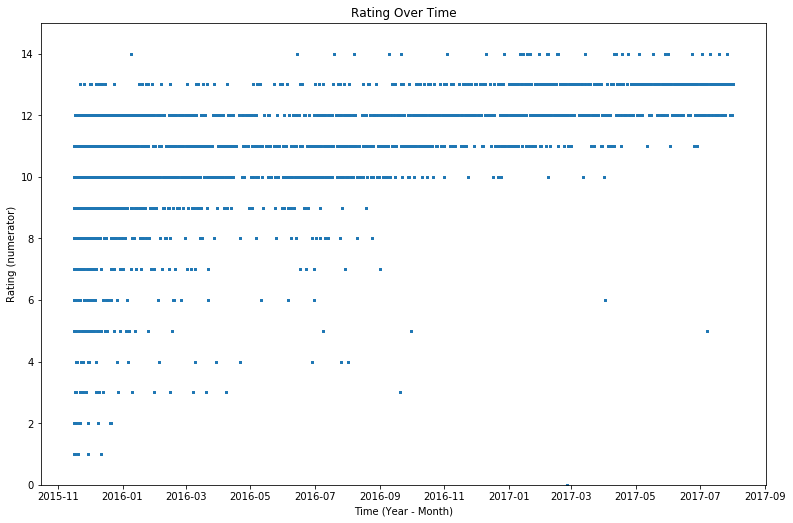

In [129]:
plt.figure(1, figsize = (13, 8.5))
plt.plot(combine_clean_all.timestamp, combine_clean_all.rating_numerator, marker='o', linestyle='', ms = 2)
plt.ylim(0,15)
plt.title('Rating Over Time')
plt.ylabel('Rating (numerator)')
plt.xlabel('Time (Year - Month)')
plt.show()

In [ ]:
conclusion :it looks like as time went on dog_rates stopped rating dogs under 10. 